In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import isnan
from scipy.io import arff
data = arff.loadarff('chronic_kidney_disease.arff')
train= pd.DataFrame(data[0])
train['al'] = train['al'].str.decode('utf-8') 
train['su'] = train['su'].str.decode('utf-8') 
train['rbc'] = train['rbc'].str.decode('utf-8')
train['pc'] = train['pc'].str.decode('utf-8') 
train['pcc'] = train['pcc'].str.decode('utf-8') 
train['ba'] = train['ba'].str.decode('utf-8') 
train['htn'] = train['htn'].str.decode('utf-8')
train['dm'] = train['dm'].str.decode('utf-8') 
train['cad'] = train['cad'].str.decode('utf-8') 
train['appet'] = train['appet'].str.decode('utf-8') 
train['pe'] = train['pe'].str.decode('utf-8') 
train['sg'] = train['sg'].str.decode('utf-8') 
train['ane'] = train['ane'].str.decode('utf-8') 
train['class'] = train['class'].str.decode('utf-8')
train = train.replace('?', np.nan)

In [ ]:
train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
train = train.replace('?', np.nan)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [ ]:
train.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
train.dtypes.value_counts()

object     14
float64    11
dtype: int64

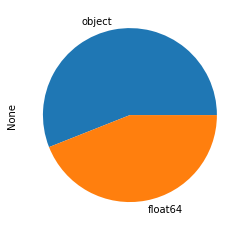

In [ ]:
train.dtypes.value_counts().plot.pie()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb02be3ed90>,
      dtype=object)

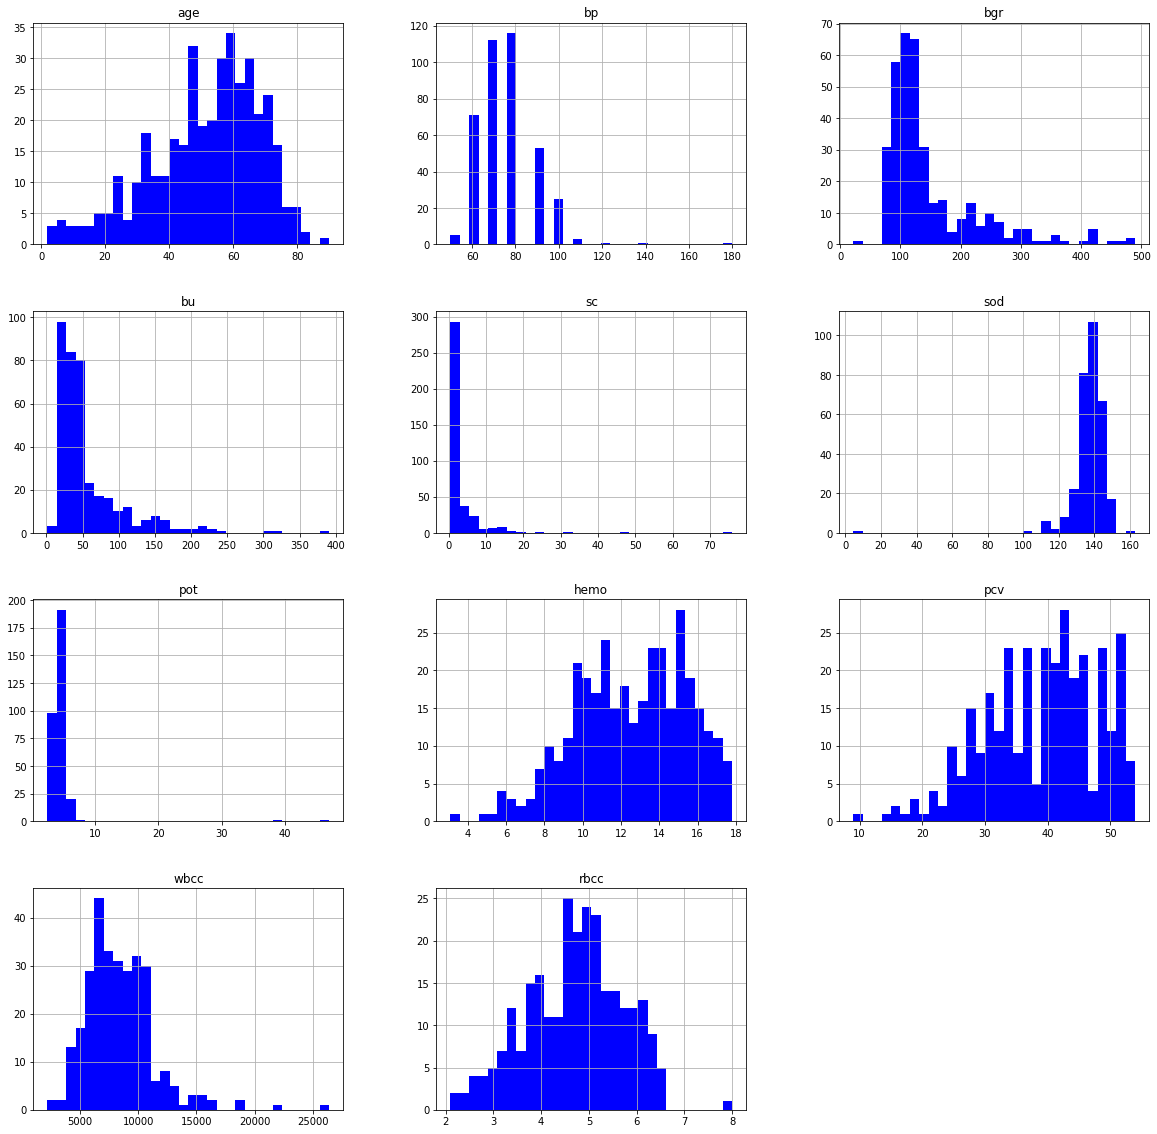

In [ ]:
train.hist(bins = 30, figsize =(20,20), color='blue')

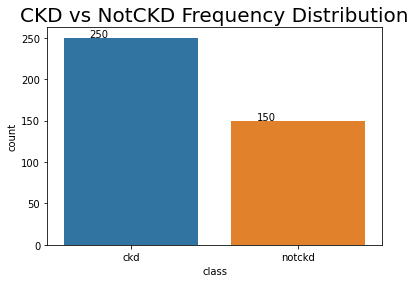

In [ ]:
ax = sns.countplot(data = train, x ='class')
ax.set_title('CKD vs NotCKD Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

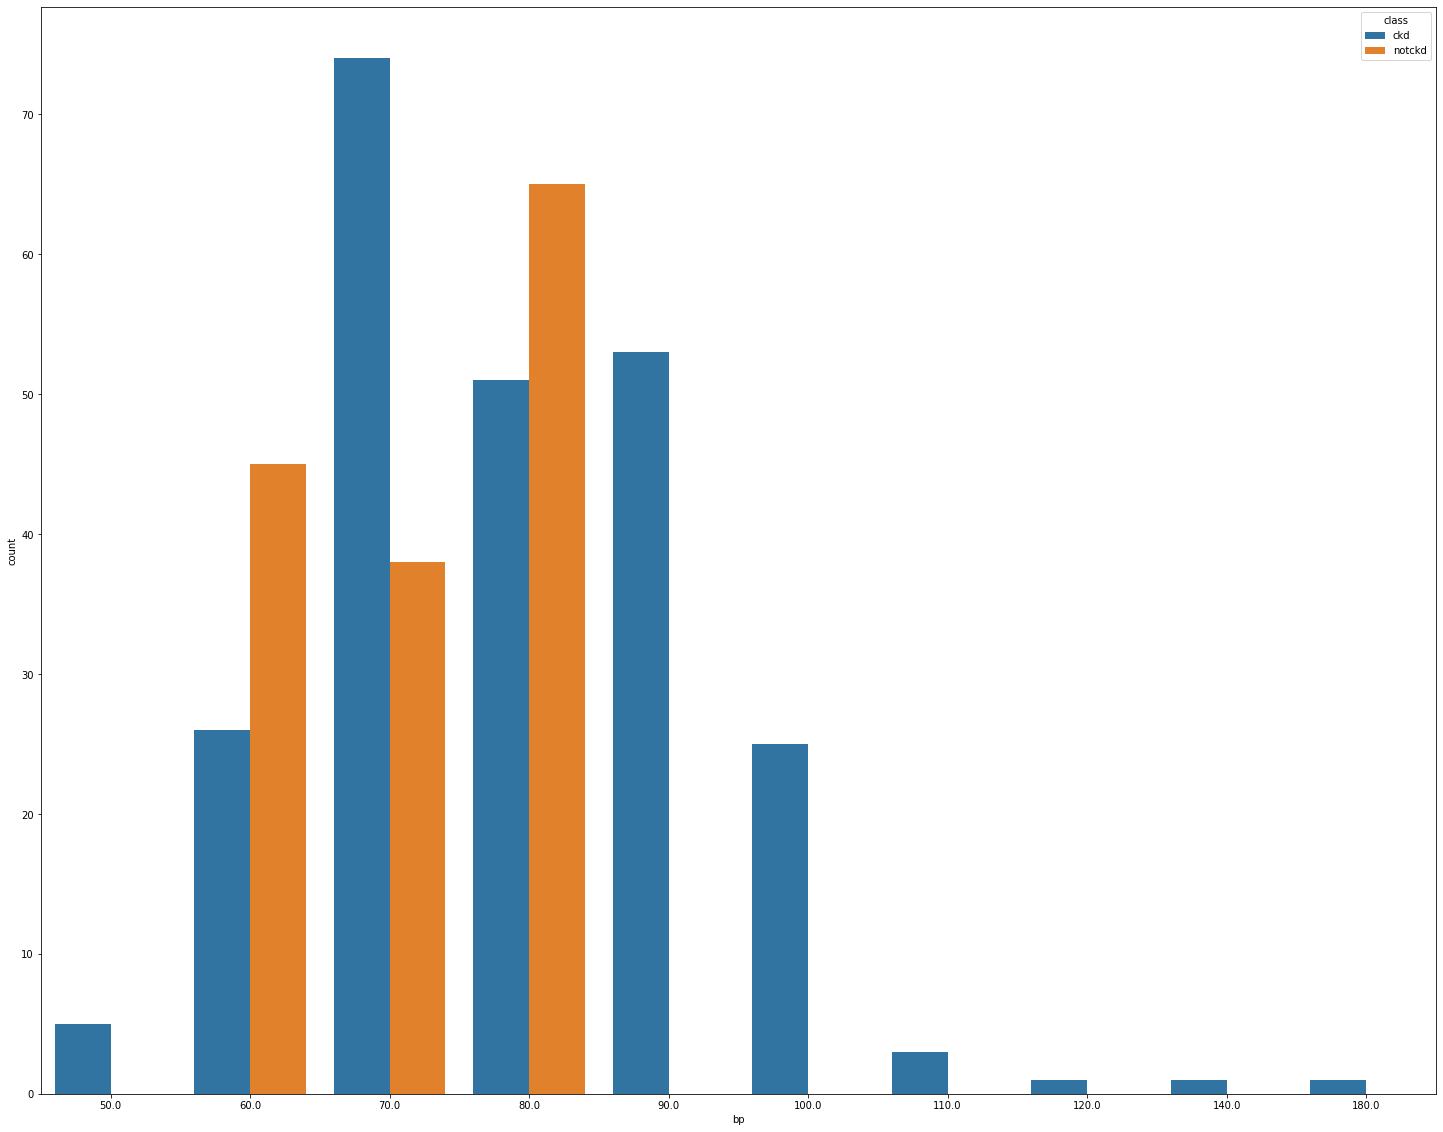

In [ ]:
plt.figure(figsize=(25,20))
sns.countplot(x = 'bp', hue= 'class', data= train)

In [ ]:
ckd = train[train['class'] == 1]
notckd = train[train['class'] == 0]

Text(0.5, 0, 'bgr')

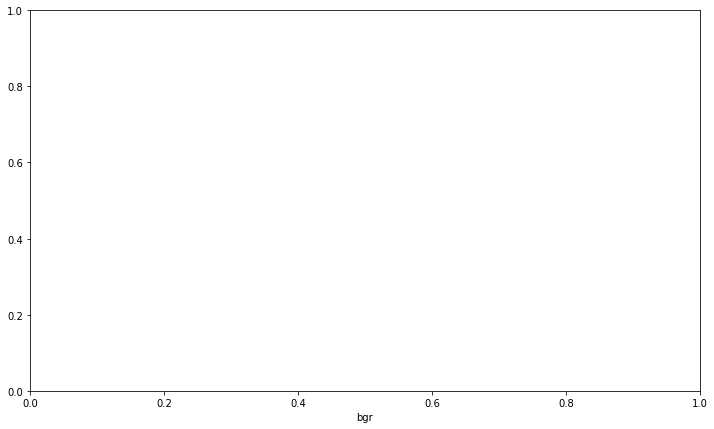

In [ ]:
plt.figure(figsize = (12,7))
sns.kdeplot(ckd['bgr'],label='ckd',shade=True,color='b')
sns.kdeplot(notckd['bgr'],label='notckd',shade=True,color='r')
plt.xlabel('bgr')

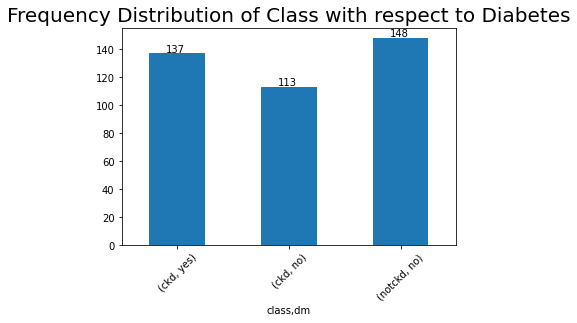

In [ ]:
ax = train['dm'].groupby(train['class']).value_counts().plot(kind='bar')
ax.set_title('Frequency Distribution of Class with respect to Diabetes', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

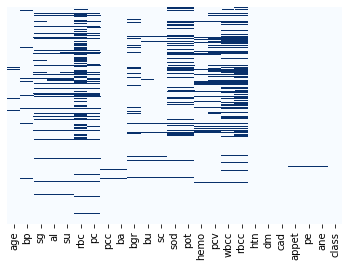

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False , cbar=False, cmap='Blues')

In [ ]:
missing_value_cnt = train.isnull().sum()
missing_value_cnt
percentage=((train.isna().sum()*100/train.shape[0]))
data_types = train.dtypes
data_types
missing_values_table = pd.concat([missing_value_cnt, percentage, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 

                                                       1 : 'Percentage',
                                                       2 : 'Data Types'})
missing_values_table

,Missing Values,Percentage,Data Types
age,9,2.25,float64
bp,12,3.00,float64
sg,47,11.75,object
al,46,11.50,object
su,49,12.25,object
rbc,152,38.00,object
pc,65,16.25,object
pcc,4,1.00,object
ba,4,1.00,object
bgr,44,11.00,float64


In [ ]:
train.loc[(train['rbcc'].isnull() == True), 'rbcc'] = train['rbcc'].mean()
train.loc[(train['age'].isnull() == True), 'age'] = train['age'].mean()
train.loc[(train['bp'].isnull() == True), 'bp'] = train['bp'].mean()
train.loc[(train['wbcc'].isnull() == True), 'wbcc'] = train['wbcc'].mean()
train.loc[(train['bgr'].isnull() == True), 'bgr'] = train['bgr'].mean()
train.loc[(train['bu'].isnull() == True), 'bu'] = train['bu'].mean()
train.loc[(train['sc'].isnull() == True), 'sc'] = train['sc'].mean()
train.loc[(train['pot'].isnull() == True), 'pot'] = train['pot'].mean()
train.loc[(train['sod'].isnull() == True), 'sod'] = train['sod'].mean()
train.loc[(train['hemo'].isnull() == True), 'hemo'] = train['hemo'].mean()
train.loc[(train['pcv'].isnull() == True), 'pcv'] = train['pcv'].mean()

In [ ]:
train['rbc'] = train['rbc'].fillna(train['rbc'].value_counts().idxmax())
train['pc'] = train['pc'].fillna(train['pc'].value_counts().idxmax())
train['pcc'] = train['pcc'].fillna(train['pcc'].value_counts().idxmax())
train['ba'] = train['ba'].fillna(train['ba'].value_counts().idxmax())
train['htn'] = train['htn'].fillna(train['htn'].value_counts().idxmax())
train['dm'] = train['dm'].fillna(train['dm'].value_counts().idxmax())
train['cad'] = train['cad'].fillna(train['cad'].value_counts().idxmax())
train['appet'] = train['appet'].fillna(train['appet'].value_counts().idxmax())
train['pe'] = train['pe'].fillna(train['pe'].value_counts().idxmax())
train['ane'] = train['ane'].fillna(train['ane'].value_counts().idxmax())
train['class'] = train['class'].fillna(train['class'].value_counts().idxmax())
train['sg'] = train['sg'].fillna(train['sg'].value_counts().idxmax())
train['al'] = train['al'].fillna(train['al'].value_counts().idxmax())
train['su'] = train['su'].fillna(train['su'].value_counts().idxmax())

In [ ]:
missing_value_cnt = train.isnull().sum()
missing_value_cnt
percentage=((train.isna().sum()*100/train.shape[0])).sort_values(ascending=True)
data_types = train.dtypes
data_types
missing_values_table = pd.concat([missing_value_cnt, percentage, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 

                                                       1 : 'Percentage',
                                                       2 : 'Data Types'})
missing_values_table

,Missing Values,Percentage,Data Types
age,0,0.0,float64
bp,0,0.0,float64
sg,0,0.0,object
al,0,0.0,object
su,0,0.0,object
rbc,0,0.0,object
pc,0,0.0,object
pcc,0,0.0,object
ba,0,0.0,object
bgr,0,0.0,float64


In [ ]:
train['rbc'] = train['rbc'].apply(lambda x:1 if x == 'normal' else 0)
train['pc'] = train['pc'].apply(lambda x:1 if x == 'normal' else 0)
train['pcc'] = train['pcc'].apply(lambda x:1 if x == 'present' else 0)
train['ba'] = train['ba'].apply(lambda x:1 if x == 'present' else 0)
train['htn'] = train['htn'].apply(lambda x:1 if x == 'yes' else 0)
train['dm'] = train['dm'].apply(lambda x:1 if x == 'yes' else 0)
train['appet'] = train['appet'].apply(lambda x:1 if x == 'good' else 0)
train['pe'] = train['pe'].apply(lambda x:1 if x == 'yes' else 0)
train['ane'] = train['ane'].apply(lambda x:1 if x == 'yes' else 0)
train['class'] = train['class'].apply(lambda x:1 if x == 'ckd' else 0)
train['cad'] = train['cad'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
ckd = train[train['class'] == 1]
notckd = train[train['class'] == 0]

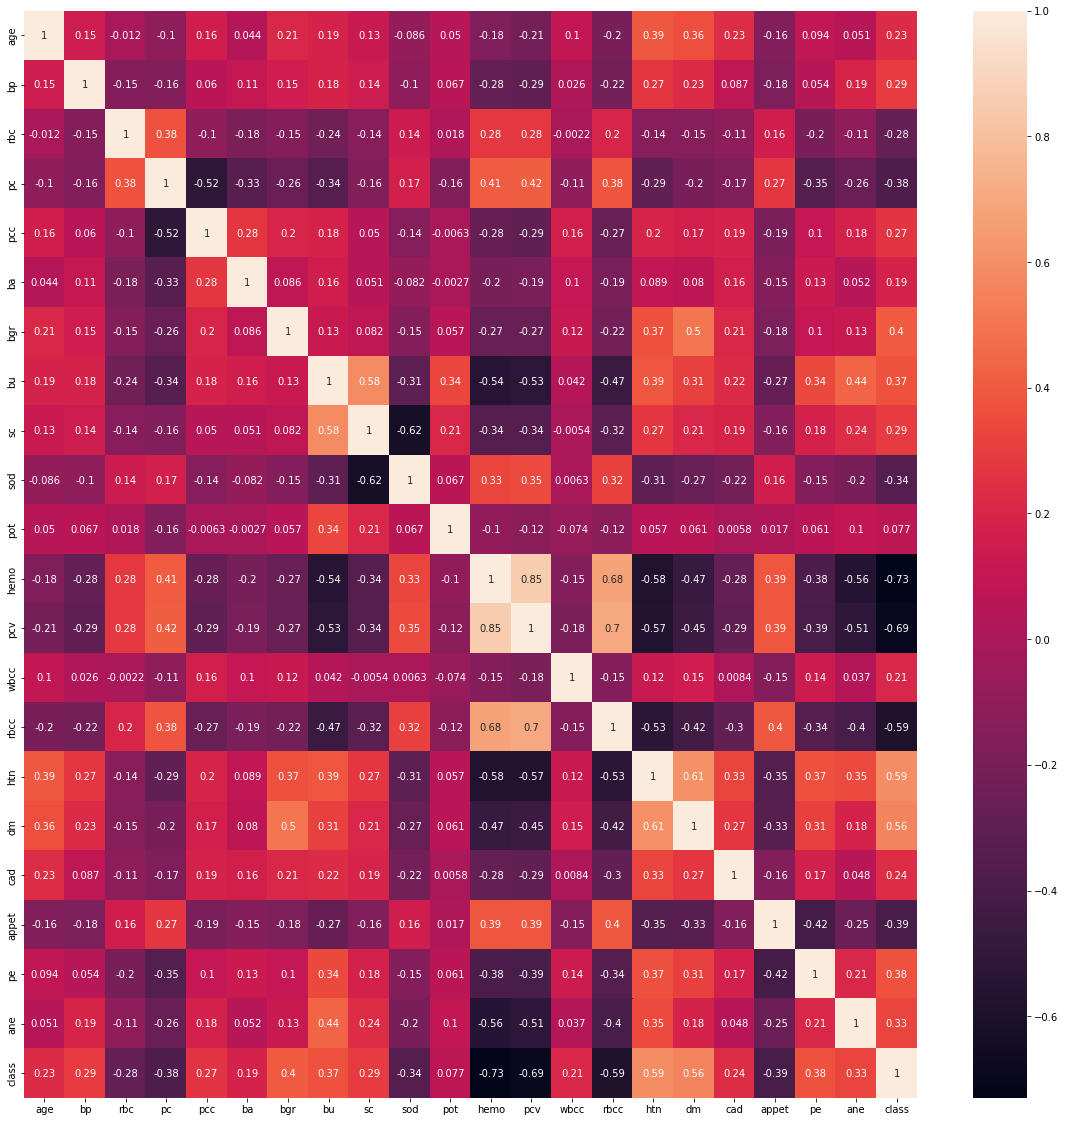

In [ ]:
corr = train.corr()
f, ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True)

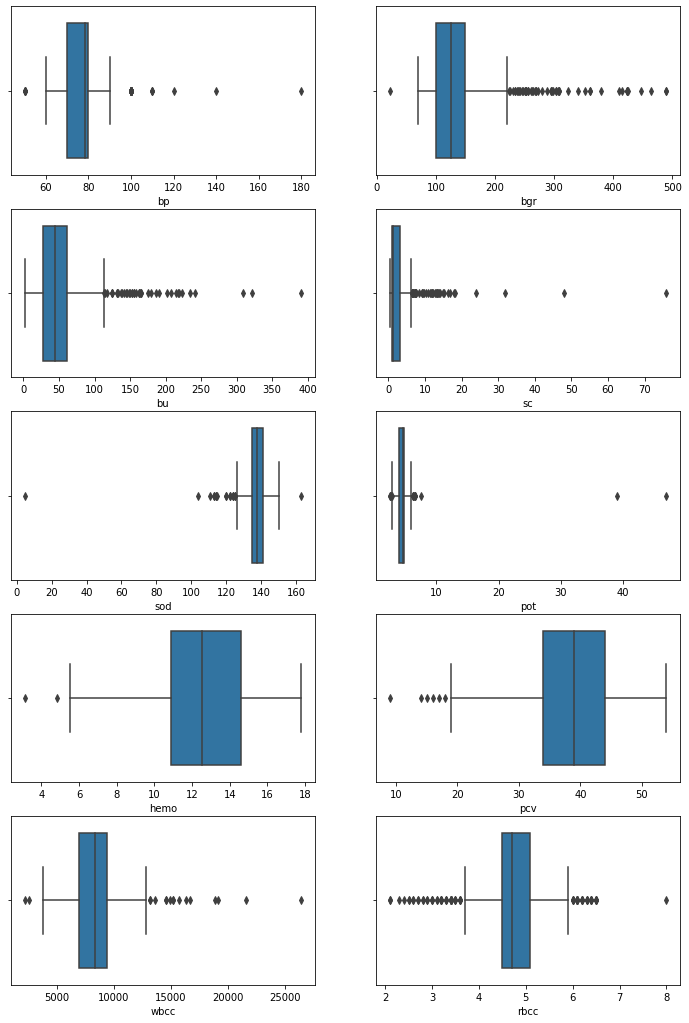

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12,18))
fs = ['bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc' ,'age']
for i, axi in enumerate(axes.flat):
    sns.boxplot(x=fs[i], hue='class', data=train, ax=axi) 

In [ ]:
accr = []
pres = []
rec = []
f = []

## KNN basique

In [ ]:
y = train['class']
x = train.loc[:, train.columns != 'class']
x.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_tmp = scaler.fit_transform(x)
x = x_tmp

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(x_train, y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))


The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 3, 'weights': 'distance'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=3, weights='distance')


In [ ]:
#KNN predictions on test features
knn_prediction = knn_grid_search.predict(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric='manhattan',n_neighbors=3)
knn=classifier.fit(x_train, y_train)
y_pred = knn.predict(x_test)

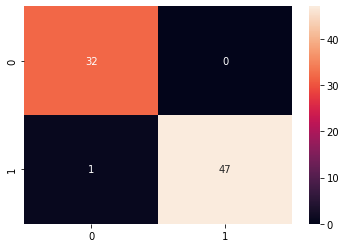

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score:',f1)

Accuracy:  0.9875
Precision: 1.0
Recall:  0.9791666666666666
F1 score: 0.9894736842105264


In [ ]:
accr = np.array([accuracy])
pres = np.array([precision])
rec = np.array([recall])
f = np.array([f1])

0.9895833333333333


Text(0.5, 0, 'False Positive Rate')

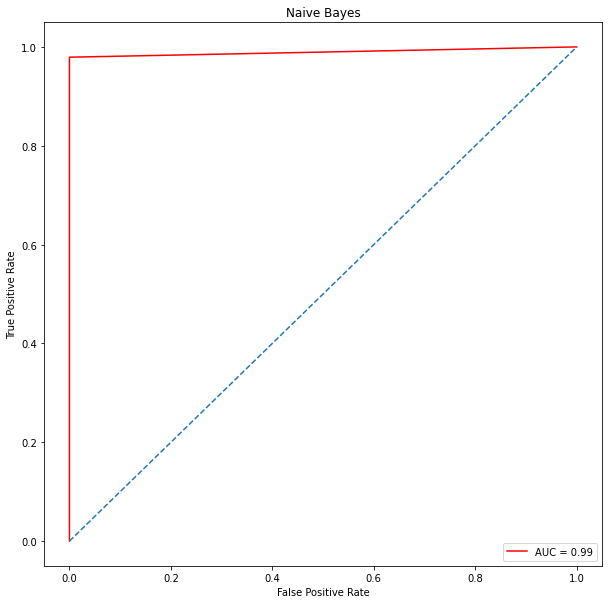

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.figure(figsize=(10,10))
plt.title('KNN')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## SVM basique

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
model=svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20,40],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)
clf.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20, 40], 'kernel': ['rbf', 'linear']})

In [ ]:
data1 = pd.DataFrame(clf.cv_results_)
data1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004050,0.000543,0.001434,0.000114,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.9875,0.9875,0.9375,0.9375,0.9375,0.9575,0.024495,8
1,0.001549,0.000105,0.000528,0.000036,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0000,1.0000,0.9750,0.9500,0.9625,0.9775,0.020000,4
2,0.001884,0.000064,0.000721,0.000015,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0000,1.0000,0.9750,0.9500,0.9625,0.9775,0.020000,4
3,0.001204,0.000031,0.000444,0.000010,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0000,1.0000,0.9875,0.9500,0.9875,0.9850,0.018371,1
4,0.001889,0.000233,0.000760,0.000121,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0000,1.0000,0.9750,0.9500,0.9625,0.9775,0.020000,4
5,0.001571,0.000310,0.000537,0.000048,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0000,1.0000,0.9750,0.9500,0.9875,0.9825,0.018708,3
6,0.001643,0.000103,0.000640,0.000093,40,rbf,"{'C': 40, 'kernel': 'rbf'}",1.0000,1.0000,0.9875,0.9625,0.9750,0.9850,0.014577,1
7,0.001233,0.000102,0.000487,0.000077,40,linear,"{'C': 40, 'kernel': 'linear'}",1.0000,1.0000,0.9625,0.9375,0.9875,0.9775,0.024238,4


In [ ]:
data1[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.9575
1,1,linear,0.9775
2,10,rbf,0.9775
3,10,linear,0.9850
4,20,rbf,0.9775
5,20,linear,0.9825
6,40,rbf,0.9850
7,40,linear,0.9775


In [ ]:
clf.best_score_

0.985

In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
model=svm.SVC(kernel='linear',C=20,gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [ ]:

y_pred_test = clf.predict(x_test)

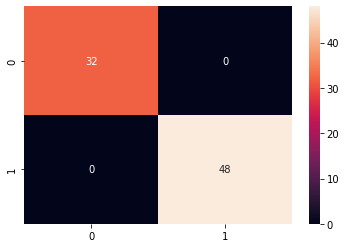

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred_test)
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred_test)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred_test)
print('F1 score:',f1)

Accuracy:  1.0
Precision: 1.0
Recall:  1.0
F1 score: 1.0


In [ ]:
from sklearn.svm import SVC
from sklearn import svm
model=svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

In [ ]:
#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(x_train, y_train)


GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [ ]:
#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

The best parameters are:
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=10, kernel='linear', random_state=0)


In [ ]:
#svm predictions on test features
svm_prediction = svm_grid_search.predict(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
import sklearn.metrics as metrics


#Create a svm Classifier
clf = svm.SVC(C=10,  kernel='linear',gamma=1, random_state=42) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

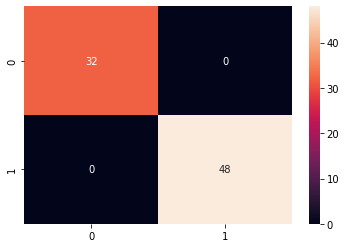

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score:',f1)

Accuracy:  1.0
Precision: 1.0
Recall:  1.0
F1 score: 1.0


In [ ]:
accr = np.append(accr,accuracy)
pres = np.append(pres, precision)
rec = np.append(rec, recall)
f = np.append(f, f1)

1.0


Text(0.5, 0, 'False Positive Rate')

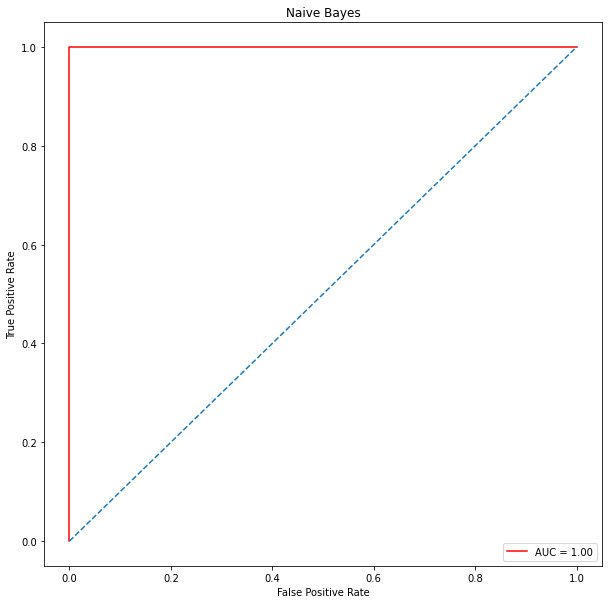

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.figure(figsize=(10,10))
plt.title('SVM')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
import sklearn.metrics 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score:',f1)

Accuracy:  0.975
Precision: 1.0
Recall:  0.9583333333333334
F1 score: 0.9787234042553191


In [ ]:
accr = np.append(accr,accuracy)
pres = np.append(pres, precision)
rec = np.append(rec, recall)
f = np.append(f, f1)

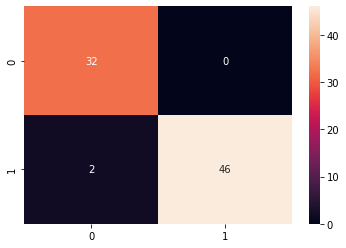

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
models = ['KNN', 'SVM', 'NB']

In [ ]:
import plotly.graph_objects as go
import plotly

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=models, y=accr, name='accuracies',
                       line=dict(color='firebrick', width=4)))

# to add text
#fig.add_trace(go.Scatter(x=models, y=accs, name='accuracies',
 #                       line=dict(color='firebrick', width=4),mode='lines+markers+text',text=accs,textposition='top right'))

fig.add_trace(go.Scatter(x=models, y=pres, name = 'precision',
                         line=dict(color='green', width=4,dash='dash')))

fig.add_trace(go.Scatter(x=models, y=rec, name='recalls',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=models, y=f, name='F1 Score',
                         line=dict(color='orange', width=4)))
fig.update_layout(
        title="Model Performance",
        #xaxis_title="models",
        #yaxis_title="metrics",
    )



In [ ]:
eval = np.stack((accr, pres ,rec ,f), axis=1)
print(eval)

[[0.9875     1.         0.97916667 0.98947368]
 [1.         1.         1.         1.        ]
 [0.975      1.         0.95833333 0.9787234 ]]


In [ ]:

print(models)

['KNN', 'SVM', 'NB']


In [ ]:
import pandas as pd

# Create the dataframe
df = pd.DataFrame(eval, index=["KNN", "SVM", "NB"], columns=["Accuracy(%)", "Precision(%)", "Recall(%)", "F1 Score(%)"])
df.head()

,Accuracy(%),Precision(%),Recall(%),F1 Score(%)
KNN,0.9875,1.0,0.979167,0.989474
SVM,1.0000,1.0,1.000000,1.000000
NB,0.9750,1.0,0.958333,0.978723


0.9791666666666667


Text(0.5, 0, 'False Positive Rate')

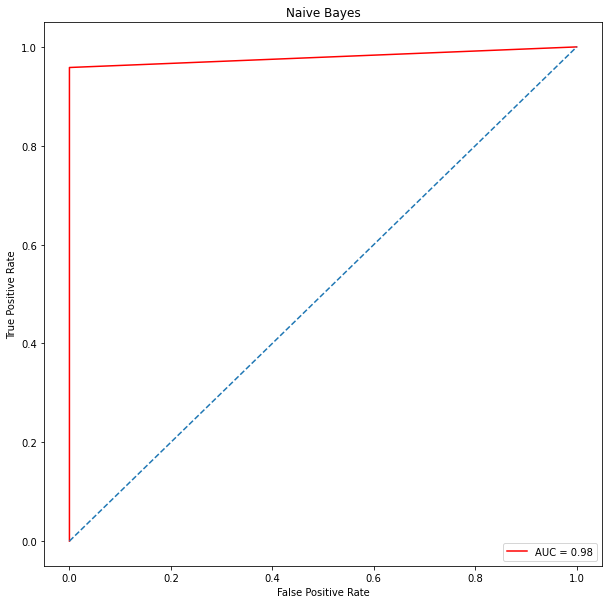

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

plt.figure(figsize=(10,10))
plt.title('Naive Bayes')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=90)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
import sklearn.metrics 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score:',f1)

## Decision tree

In [ ]:
## bel parametre

param_dict={ "criterion": ['gini', 'entropy'], "max_depth": range(1,10), "min_samples_split" :range (1,10), "min_samples_leaf": range(1,5)}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
grid=GridSearchCV( DecisionTreeClassifier(), param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(x_train,y_train)

In [ ]:

grid.best_params_

In [ ]:

grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf =DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3)


# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
import sklearn.metrics 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision:',precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score:',f1)